In [1]:
#importing libraries to retrieve data and read csv and to perform EDa tasks
import pandas as pd
import numpy as np
#importing for visualisation
import seaborn as sns

In [2]:
data = pd.read_csv('Customer_Churn.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#descriptive stats for numeric columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [5]:
#$checking null Values in the data
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#changing total charges to numeric as it is continuos variable
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

In [8]:
#drop nan values
data = data.dropna(how='any', axis = 0)

In [9]:
data = data.reset_index()
data

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [10]:
#extratcing columns names with "object" Datatype
cols = data.select_dtypes(include=['object']).columns
cols
#copying datset
data2 = data.copy()

In [11]:
# now changing data via label encoding/....
# so thay we can apply for model
from sklearn.preprocessing import LabelEncoder

#making instance of labelnecoder
le = LabelEncoder()

#fitting and transforming
for col in cols:
    data2[col] = le.fit_transform(data2[col].astype(str))
# checking the datatypes chnges or not
print (data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7032 non-null   int64  
 1   customerID        7032 non-null   int32  
 2   gender            7032 non-null   int32  
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   int32  
 5   Dependents        7032 non-null   int32  
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   int32  
 8   MultipleLines     7032 non-null   int32  
 9   InternetService   7032 non-null   int32  
 10  OnlineSecurity    7032 non-null   int32  
 11  OnlineBackup      7032 non-null   int32  
 12  DeviceProtection  7032 non-null   int32  
 13  TechSupport       7032 non-null   int32  
 14  StreamingTV       7032 non-null   int32  
 15  StreamingMovies   7032 non-null   int32  
 16  Contract          7032 non-null   int32  


In [12]:
data2.head()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,5365,0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,1,3953,1,0,0,0,34,1,0,0,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2,2558,1,0,0,0,2,1,0,0,...,0,0,0,0,0,1,3,53.85,108.15,1
3,3,5524,1,0,0,0,45,0,1,0,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,4,6500,0,0,0,0,2,1,0,1,...,0,0,0,0,0,1,2,70.70,151.65,1


In [13]:
# dividing data for linear regression as independent and dependent

In [14]:
X_l = data2.drop('TotalCharges', axis = 1)

In [15]:
y_l = data2['TotalCharges']

In [16]:
print(X_l,y_l)

      index  customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0         0        5365       0              0        1           0       1   
1         1        3953       1              0        0           0      34   
2         2        2558       1              0        0           0       2   
3         3        5524       1              0        0           0      45   
4         4        6500       0              0        0           0       2   
...     ...         ...     ...            ...      ...         ...     ...   
7027   7038        4843       1              0        1           1      24   
7028   7039        1524       0              0        1           1      72   
7029   7040        3358       0              0        1           1      11   
7030   7041        5923       1              1        1           0       4   
7031   7042        2221       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService 

In [17]:
# improting library for splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size = 0.25, random_state = 1111)

In [18]:
#importing lib for data to be align in standard scaling manner
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_l = sc.fit_transform(X_train_l)
X_test_l = sc.transform(X_test_l)

# Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).

In [19]:
#Calling the algorithm
from sklearn import linear_model #Parametric Model

In [20]:
#instance of linear reg
regr = linear_model.LinearRegression()


In [21]:
#Training
regr.fit(X_train_l,y_train_l)

LinearRegression()

In [22]:
# The coefficients
print('Coefficients', regr.coef_)
print('Intercept',regr.intercept_)

Coefficients [ 1.67435056e+00 -1.21592576e+00  9.36384978e+00  7.47791487e-01
  8.75532709e+00 -1.64395198e+01  1.49795207e+03 -1.32435809e+01
  3.52073262e+01 -1.32013722e+01  9.14191335e+01  1.14980710e+02
  8.41858741e+01  8.09522416e+01  4.15371148e+01  4.78567718e+01
 -8.67741524e+01 -8.33581430e+00  5.43558008e+01  1.04663509e+03
 -8.03192908e+01]
Intercept 2277.7827645051198


In [23]:
#Testing
y_pred = regr.predict(X_test_l)

In [24]:
y_pred

array([ 3305.85602142, -1200.14107553,  2628.85368217, ...,
        1658.15012059,  3140.1184813 ,  3199.74513975])

In [25]:
#finding acuuracy and RMSE
from sklearn.metrics import mean_squared_error, r2_score, f1_score
print(mean_squared_error(y_test_l, y_pred, squared = False)) #RMSE

691.966743826788


In [26]:
print(r2_score(y_test_l, y_pred))

0.9067679081449613


<AxesSubplot:>

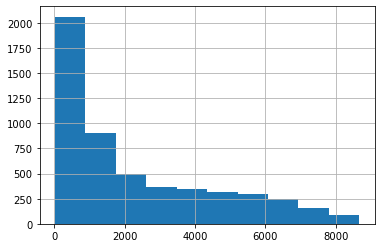

In [33]:
#visualisation for training data
import matplotlib as plt
(y_train_l.hist())

<AxesSubplot:>

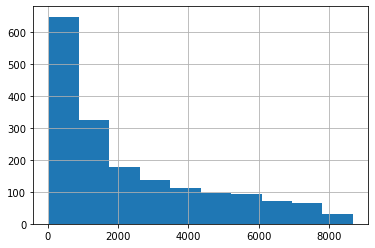

In [34]:
#visualisation for testing data
(y_test_l.hist())

In [35]:
#dividing independent and dependent variables
X = data2.iloc[:,:21]
y = data2.iloc[:,21:]

In [36]:
X.head()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,5365,0,0,1,0,1,0,1,0,...,2,0,0,0,0,0,1,2,29.85,29.85
1,1,3953,1,0,0,0,34,1,0,0,...,0,2,0,0,0,1,0,3,56.95,1889.50
2,2,2558,1,0,0,0,2,1,0,0,...,2,0,0,0,0,0,1,3,53.85,108.15
3,3,5524,1,0,0,0,45,0,1,0,...,0,2,2,0,0,1,0,0,42.30,1840.75
4,4,6500,0,0,0,0,2,1,0,1,...,0,0,0,0,0,0,1,2,70.70,151.65


In [37]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [38]:
# improting library for splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1111)

In [39]:
#checking the shape of training and testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5274, 21)
(1758, 21)
(5274, 1)
(1758, 1)


In [40]:
#importing lib for data to be align in standard scaling manner
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [41]:
#importing library for logistic regression
from sklearn.linear_model import LogisticRegression 

In [42]:
#Creating intsnce of logistic regression and then fitting the data
logistic_reg= LogisticRegression()
logistic_reg.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [43]:
#predicting the test data.....
y_pred=logistic_reg.predict(X_test)

In [44]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [45]:
#predcition on train data
y_pred_train = logistic_reg.predict(X_train)

In [46]:
#importing library for confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1165,  138],
       [ 206,  249]], dtype=int64)

In [47]:
#finding accuracy of model
log_acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ',log_acc)

Accuracy:  0.8043230944254836


<AxesSubplot:>

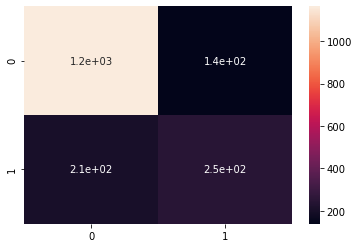

In [48]:
sns.heatmap(cnf_matrix, annot=True)

In [49]:
#importing library for classification_report and finding report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1303
           1       0.64      0.55      0.59       455

    accuracy                           0.80      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.80      0.80      1758



# Desicion Tree

A decision tree is a tree-like graph with nodes representing the place where we pick an attribute and ask a question; edges represent the answers the to the question; and the leaves represent the actual output or class label. They are used in non-linear decision making with simple linear decision surface.

In [50]:
#importing library for Descision Tree and we have two criterion for DT 'gini' and 'Entropy'
# you can use gini when there is binary classification otherwise use entropy
from sklearn.tree import DecisionTreeClassifier
#making instance of DT
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0,
                                    max_depth = 2, min_samples_leaf = 10, min_samples_split = 20
                                   )
#fitting the training data
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=20,
                       random_state=0)

In [51]:
#prediction using 'testing' data
y_pred = classifier.predict(X_test)

In [52]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [53]:
#checking score via importing library
from sklearn.metrics import accuracy_score
DT_acc = accuracy_score(y_pred,y_test)
DT_acc

0.7468714448236633

### **Confusion matrix**

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

In [54]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[985, 318],
       [127, 328]], dtype=int64)

In [55]:
#checking Auc_Roc_Score via importing library
from sklearn.metrics import roc_auc_score

In [56]:
roc_auc_score(y_test,y_pred)

0.7384134668094761

<h3><center>Hypertuning
    


it is used to increases the performance of a model via providing best parameters

In [57]:
#importing library for hypertuning
from sklearn.model_selection import GridSearchCV

In [58]:
pGrid = {'max_depth': range(2, 10), # 8
        'min_samples_leaf': range(10, 51, 10),  # 5
        'min_samples_split': range(20, 81, 20)}   # 4
#intance of GScv
gscv = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = pGrid, cv = 5,
                       scoring = 'recall', n_jobs = -1, verbose = True)

In [59]:
#fitiing the data
gscv.fit(X,y)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(10, 51, 10),
                         'min_samples_split': range(20, 81, 20)},
             scoring='recall', verbose=True)

In [60]:
#finding best params for model
gscv.best_params_

{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 20}

# RANDOM FOREST

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean/average prediction of the individual trees. 

In [61]:
from sklearn.ensemble import RandomForestClassifier

classifier2 = RandomForestClassifier(n_estimators = 70, criterion = 'gini', random_state = 0)
classifier2.fit(X_train, y_train)

<ipython-input-61-f87858d2a048>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier2.fit(X_train, y_train)


RandomForestClassifier(n_estimators=70, random_state=0)

In [62]:
y_pred = classifier2.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
RF_acc = accuracy_score(y_test,y_pred)
RF_acc

0.8048919226393629

In [65]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.706751958708981

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1186,  117],
       [ 226,  229]], dtype=int64)

In [67]:
pargrid_rf = {'n_estimators': [70, 80, 90, 100, 120],
                  'max_features': [5,10,15,20,25]}

gscv_rf = GridSearchCV(estimator = RandomForestClassifier(), 
                        param_grid = pargrid_rf, 
                        cv = 5,
                        verbose = True, 
                        n_jobs = -1)

gscv_rf.fit(X, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.79081083 0.79152227 0.78853568 0.79138134 0.79351394 0.78924712
 0.79109603 0.7879673  0.78711411 0.78910457 0.78483947 0.78199442
 0.78554899 0.78114144 0.78469651 0.78284709 0.77971765 0.7831323
 0.78299045 0.78569164        nan        nan        nan        nan
        nan]
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [5, 10, 15, 20, 25],
                         'n_estimators': [70, 80, 90, 100, 120]},
             verbose=True)

In [68]:
gscv_rf.best_params_

{'max_features': 5, 'n_estimators': 120}

Importing libraries to draw tree structre

In [69]:
from matplotlib import pyplot as plt
from sklearn import tree

[Text(418.5, 453.0, 'X[16] <= -0.222\ngini = 0.392\nsamples = 5274\nvalue = [3860, 1414]'),
 Text(209.25, 271.8, 'X[10] <= -0.334\ngini = 0.49\nsamples = 2931\nvalue = [1669, 1262]'),
 Text(104.625, 90.59999999999997, 'gini = 0.5\nsamples = 1985\nvalue = [970, 1015]'),
 Text(313.875, 90.59999999999997, 'gini = 0.386\nsamples = 946\nvalue = [699, 247]'),
 Text(627.75, 271.8, 'X[19] <= 1.165\ngini = 0.121\nsamples = 2343\nvalue = [2191, 152]'),
 Text(523.125, 90.59999999999997, 'gini = 0.077\nsamples = 1912\nvalue = [1835, 77]'),
 Text(732.375, 90.59999999999997, 'gini = 0.287\nsamples = 431\nvalue = [356, 75]')]

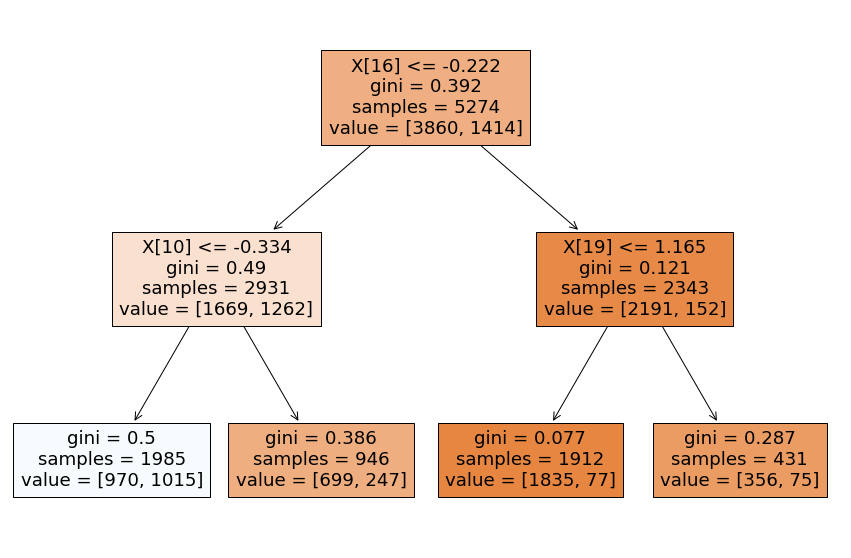

In [70]:
plt.figure(figsize = (15,10))
tree.plot_tree(classifier, filled = True)

In [71]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_16 <= -0.22
|   |--- feature_10 <= -0.33
|   |   |--- class: 1
|   |--- feature_10 >  -0.33
|   |   |--- class: 0
|--- feature_16 >  -0.22
|   |--- feature_19 <= 1.17
|   |   |--- class: 0
|   |--- feature_19 >  1.17
|   |   |--- class: 0



# KNN

K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

In [72]:

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2,leaf_size = 10)
classifier.fit(X_train, y_train)




C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(leaf_size=10, n_neighbors=11)

In [74]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1128,  175],
       [ 211,  244]], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score
KNN_acc = accuracy_score(y_pred,y_test)
KNN_acc

0.7804323094425484

In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred,y_test)

0.7123793091770477

<AxesSubplot:>

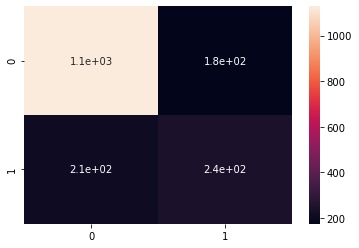

In [78]:
import seaborn as sns
sns.heatmap(cm, annot = True)

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
pGrid = {'n_neighbors': range(10,200),
        'leaf_size': range(10, 51, 10), }
gscv = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = pGrid, cv = 5,
                       scoring = 'recall', n_jobs = -1, verbose = True)

In [81]:
gscv.fit(X,y)

Fitting 5 folds for each of 950 candidates, totalling 4750 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': range(10, 51, 10),
                         'n_neighbors': range(10, 200)},
             scoring='recall', verbose=True)

In [82]:
gscv.best_params_

{'leaf_size': 10, 'n_neighbors': 11}

# SVM# 

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well

In [83]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0, C = 10, gamma = 0.01)
classifier.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=10, gamma=0.01, kernel='linear', random_state=0)

In [84]:
y_pred = classifier.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1155,  148],
       [ 225,  230]], dtype=int64)

In [86]:
from sklearn.metrics import accuracy_score
SVM_acc = accuracy_score(y_pred,y_test)
SVM_acc

0.7878270762229806

In [87]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred,y_test)

0.7227110651023694

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm

In [89]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]# Generally we take the values in this range only
    gammas = [0.001, 0.01, 0.1, 1,10]
    param_grid = {'C': Cs, 'gamma' : gammas}# this is dictionary we are creating so as to get the best tuning
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)# coming from sklearn.modelselection
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [90]:
svc_param_selection(X_train,y_train,5)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  re

{'C': 10, 'gamma': 0.01}

In [91]:
classifier = SVC(kernel = 'rbf', random_state = 0,C = 10, gamma =  0.01)
classifier.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=10, gamma=0.01, random_state=0)

In [92]:
y_pred = classifier.predict(X_test)

In [93]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [94]:
from sklearn.metrics import accuracy_score
SVM_gscv_acc = accuracy_score(y_test,y_pred)
SVM_gscv_acc

0.8065984072810012

In [95]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.7036121208032182

# NAIVEBYES


Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [96]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [97]:
y_pred_nb = classifier.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score
NB_acc = accuracy_score(y_test,y_pred_nb)
NB_acc

0.7508532423208191

In [99]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_nb)

0.7425299182781915

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb)
cm

array([[990, 313],
       [125, 330]], dtype=int64)

# Bagging model

Bagged Decision Trees for Classification - necessary dependencies

Bootstrap Aggregation is a general procedure that can be used to reduce the variance for those algorithm that have high variance. An algorithm that has high variance are decision trees, like classification and regression trees

In [101]:
#IMPORTING AND FITTING THE MODEL
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier()
model.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier()

In [102]:
#PREDICTING
y_pred_bg= model.predict(X_test)

In [103]:
#importing library to check performance
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [104]:
# Accuracy on test Data
BM_model = metrics.accuracy_score(y_test, y_pred_bg)
print('Accuracy: ',BM_model)

Accuracy:  0.7736063708759955


In [105]:
# CONFUSION MATRIX
confusion_matrix=metrics.confusion_matrix(y_test,y_pred_bg)
confusion_matrix

array([[1169,  134],
       [ 264,  191]], dtype=int64)

In [106]:
# CLASSIFICATION REPORT
auc_roc=metrics.classification_report(y_test,y_pred_bg)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.82      0.90      0.85      1303
           1       0.59      0.42      0.49       455

    accuracy                           0.77      1758
   macro avg       0.70      0.66      0.67      1758
weighted avg       0.76      0.77      0.76      1758



In [107]:
#roc_auc score
auc_roc=metrics.roc_auc_score(y_test,y_pred_bg)
auc_roc

0.658470309429634

# Adaboost model

AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique that is used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights to incorrectly classified instances. Boosting is used to reduce bias as well as the variance for supervised learning. It works on the principle where learners are grown sequentially. Except for the first, each subsequent learner is grown from previously grown learners. In simple words, weak learners are converted into strong ones. 

In [108]:
# IMPORTING AND FITTING THE MODEL
from sklearn.ensemble import AdaBoostClassifier
model_ad = AdaBoostClassifier()
model_ad.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostClassifier()

In [109]:
#PREDICTING 
y_pred_ad = model_ad.predict(X_test)

In [110]:
# Accuracy on test Data
AB_model = metrics.accuracy_score(y_test, y_pred_ad)
print('Accuracy: ',AB_model)

Accuracy:  0.800910125142207


In [111]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_ad)
roc_auc_ad = auc(false_positive_rate, true_positive_rate)
roc_auc_ad

0.7162237608899158

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.

Text(0.5, 0, 'False Positive Rate')

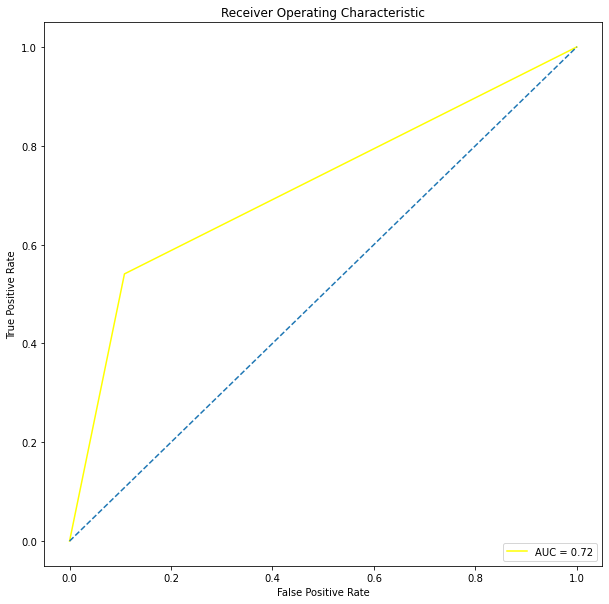

In [112]:

from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='yellow',label = 'AUC = %0.2f' % roc_auc_ad)
plt.legend( loc = "lower right")
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [116]:
lis=['Logistic Regression','Decision Tree','Random Forest','KNN','SVM','Naive bayes','Bagging','AdaBoost']
accuracy = log_acc, DT_acc, RF_acc, KNN_acc, SVM_acc, NB_acc , BM_model, AB_model
Scores=pd.DataFrame({'MODELS':lis,'ACCURACY':accuracy})
Scores

,MODELS,ACCURACY
0,Logistic Regression,0.804323
1,Decision Tree,0.746871
2,Random Forest,0.804892
3,KNN,0.780432
4,SVM,0.787827
5,Naive bayes,0.750853
6,Bagging,0.773606
7,AdaBoost,0.800910


In [125]:
Scores[(Scores['ACCURACY']) == max(Scores['ACCURACY'])]

,MODELS,ACCURACY
2,Random Forest,0.804892


SO RANDOM FOREST is best model for best classification